<div style="
    padding: 20px;
    color: #4A4A4A;
    margin: 20px;
    font-size: 28px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid red;
    background-color: black;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong style="color: white;padding :3px;">Automobile sales dataset</strong>
</div>


<div style="
    padding: 20px;
    color: #4A4A4A;
    margin: 20px;
    font-size: 18px;
    display: inline-block;
    border-radius: 10px;
    border: 2px solid #3498DB;
    background-color: #ECF0F1;
    overflow: hidden;
    font-weight: 600;
    box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);
">
    <strong style="color: #34A8sB;">Importing Modules for EDA and Visualization</strong>
</div>


In [1]:
# IMPORT BASIC LIBRARIES

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
data=pd.read_csv("/kaggle/input/auto-sales-data/Auto Sales data.csv")
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,24/02/2018,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,07/05/2018,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,01/07/2018,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,25/08/2018,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,28/10/2018,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [3]:
print(f"Shape of the data ROW x COLUMNS {data.shape}")

Shape of the data ROW x COLUMNS (2747, 20)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ORDERNUMBER           2747 non-null   int64  
 1   QUANTITYORDERED       2747 non-null   int64  
 2   PRICEEACH             2747 non-null   float64
 3   ORDERLINENUMBER       2747 non-null   int64  
 4   SALES                 2747 non-null   float64
 5   ORDERDATE             2747 non-null   object 
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64  
 7   STATUS                2747 non-null   object 
 8   PRODUCTLINE           2747 non-null   object 
 9   MSRP                  2747 non-null   int64  
 10  PRODUCTCODE           2747 non-null   object 
 11  CUSTOMERNAME          2747 non-null   object 
 12  PHONE                 2747 non-null   object 
 13  ADDRESSLINE1          2747 non-null   object 
 14  CITY                  2747 non-null   object 
 15  POSTALCODE           

In [5]:
data.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

## There is no null values

In [6]:
data["ORDERDATE"]=pd.to_datetime(data["ORDERDATE"],format="%d/%m/%Y") # change the formate to datetime  for future time series

#data transformation create new columns

data["YEAR"]=data["ORDERDATE"].dt.year
data["MONTH"]=data["ORDERDATE"].dt.month

In [7]:
data.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'DAYS_SINCE_LASTORDER', 'STATUS', 'PRODUCTLINE',
       'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'CITY',
       'POSTALCODE', 'COUNTRY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE', 'YEAR', 'MONTH'],
      dtype='object')

In [8]:
# remove some not needed columns 

data= data.drop(columns=[  'CUSTOMERNAME', 'PHONE','CONTACTLASTNAME', 'CONTACTFIRSTNAME',"ADDRESSLINE1"],axis=1)

In [9]:
# To check the  categorical features . 
# If it unique count less then 20 it good for category analysis.. else  we need to work on it

val_data = []

for i in data.columns:
    if data[i].dtype == "O":      # Checking for object-type columns
        unique_values_count = data[i].nunique()  # Counting unique values
        value_counts = data[i].value_counts()  # Counting  of each unique value
        val_data.append({'Column': i, 'UniqueValuesCount': unique_values_count, 'ValueCounts': value_counts.to_dict()})

val = pd.DataFrame(val_data)

val.sort_values(by="UniqueValuesCount")

,Column,UniqueValuesCount,ValueCounts
6,DEALSIZE,3,"{'Medium': 1349, 'Small': 1246, 'Large': 152}"
0,STATUS,6,"{'Shipped': 2541, 'Cancelled': 60, 'Resolved':..."
1,PRODUCTLINE,7,"{'Classic Cars': 949, 'Vintage Cars': 579, 'Mo..."
5,COUNTRY,19,"{'USA': 928, 'Spain': 342, 'France': 314, 'Aus..."
3,CITY,71,"{'Madrid': 304, 'San Rafael': 180, 'NYC': 152,..."
4,POSTALCODE,73,"{'28034': 259, '97562': 205, '10022': 152, '94..."
2,PRODUCTCODE,109,"{'S18_3232': 51, 'S32_2509': 28, 'S50_1392': 2..."


In [10]:
print( "Number of unique values in countries     : ",data["COUNTRY"].nunique())
print( "Number of unique values in cities        : ",data["CITY"].nunique())
print( "Number of unique values in PRODUCTLINE   : ",data["PRODUCTLINE"].nunique())
print( "Number of unique values in DEALSIZE      : ",data["DEALSIZE"].nunique())

Number of unique values in countries     :  19
Number of unique values in cities        :  71
Number of unique values in PRODUCTLINE   :  7
Number of unique values in DEALSIZE      :  3


## Here we assume below 20 count as CATEGORICAL variables


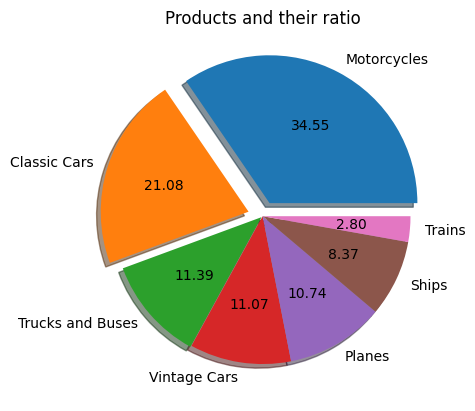

In [11]:
plt.pie(data["PRODUCTLINE"].value_counts(),labels=data["PRODUCTLINE"].unique(),autopct="%.2f",explode=[0.1,0.1,0.01,0,0,0,0],shadow=True)
plt.title("Products and their ratio")
plt.show()

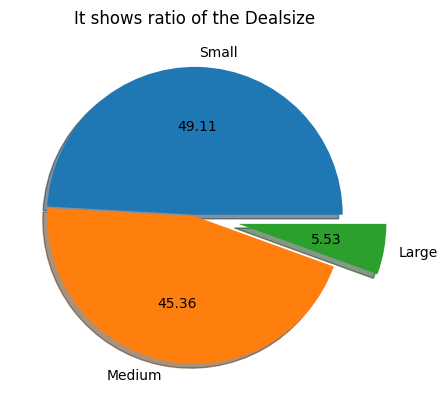

In [12]:
plt.pie(data["DEALSIZE"].value_counts(),
        labels=data["DEALSIZE"].unique(),
        autopct="%.2f",
        explode=[0.01,0,0.3],
        shadow=True)
plt.title("It shows ratio of the Dealsize")
plt.show()

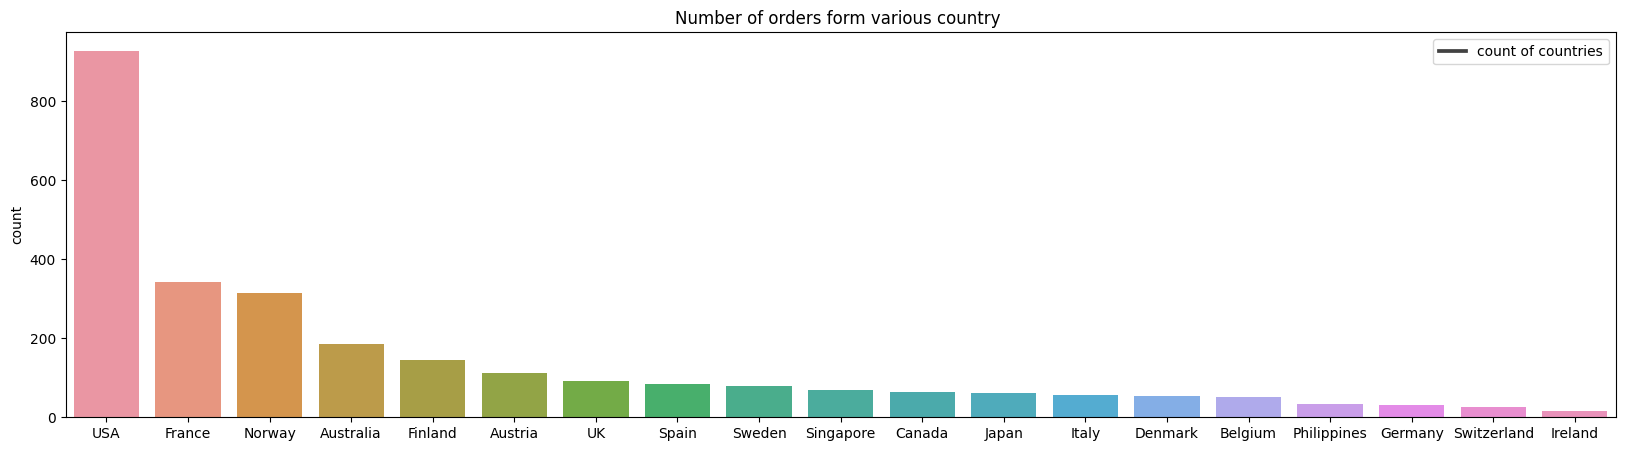

In [13]:
plt.figure(figsize=(20,5))
sns.barplot(data,x=data["COUNTRY"].unique(),y=data["COUNTRY"].value_counts())
plt.legend(["count of countries"])
plt.title("Number of orders form various country ")
plt.show()

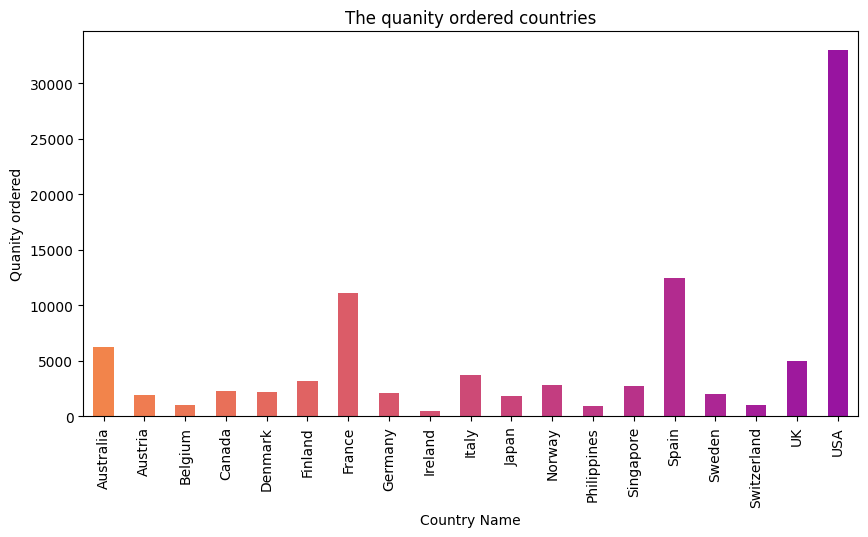

In [14]:
colors=plt.cm.plasma(np.linspace(.7, .3, 20))

plt.figure(figsize=(10,5))
data.groupby("COUNTRY")["QUANTITYORDERED"].agg("sum").plot(kind="bar",color=colors)
plt.title("The quanity ordered countries")
plt.xlabel("Country Name")
plt.ylabel("Quanity ordered")
plt.show()

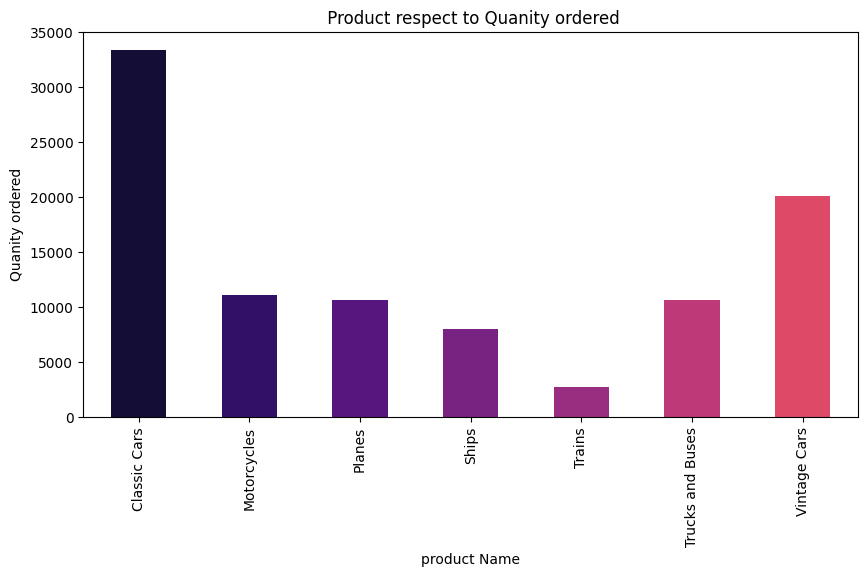

In [15]:
colors=plt.cm.magma(np.linspace(.1, .6, 7))

plt.figure(figsize=(10,5))
data.groupby("PRODUCTLINE")["QUANTITYORDERED"].agg("sum").plot(kind="bar",color=colors)
plt.title(" Product respect to Quanity ordered")
plt.xlabel("product Name")
plt.ylabel("Quanity ordered")
plt.show()

In [16]:
data.DEALSIZE.value_counts()

DEALSIZE
Medium    1349
Small     1246
Large      152
Name: count, dtype: int64

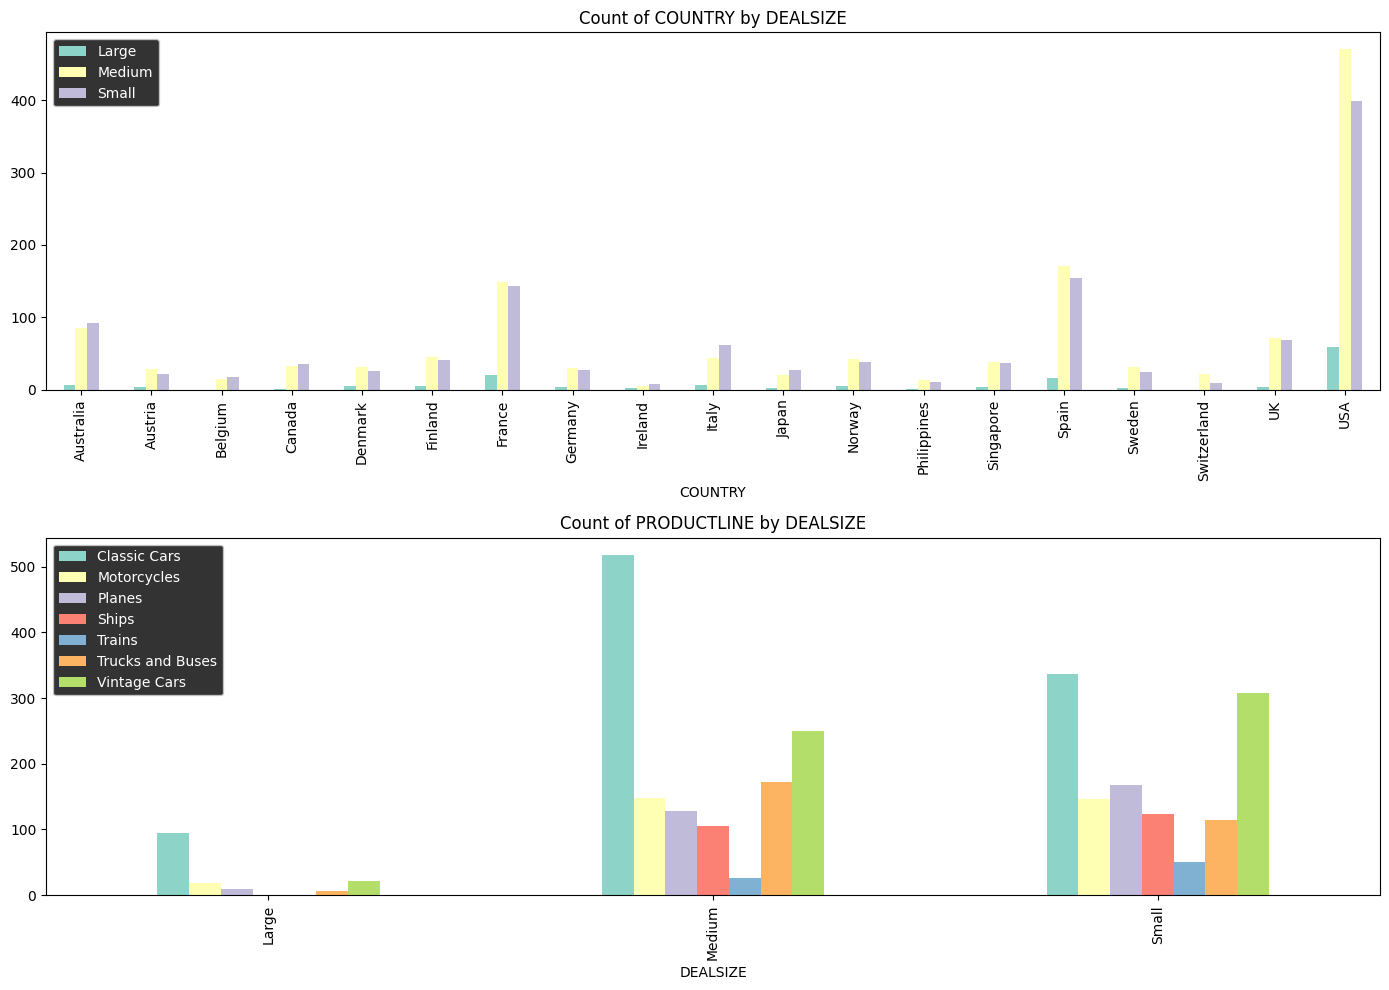

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))
plt.style.use('dark_background')
colors=plt.cm.magma(np.linspace(.1, .9, 20))

# Plot on the first subplot
data.groupby("COUNTRY")["DEALSIZE"].value_counts().sort_values().unstack().plot(
    kind="bar",
    ax=axes[0])
axes[0].set_title('Count of COUNTRY by DEALSIZE')
axes[0].legend()



colors=plt.cm.viridis(np.linspace(.4, .9, 7))
# Plot on the second subplot
data.groupby("DEALSIZE")["PRODUCTLINE"].value_counts().unstack().plot(kind="bar", ax=axes[1])
axes[1].set_title('Count of PRODUCTLINE by DEALSIZE')
axes[1].legend()



# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


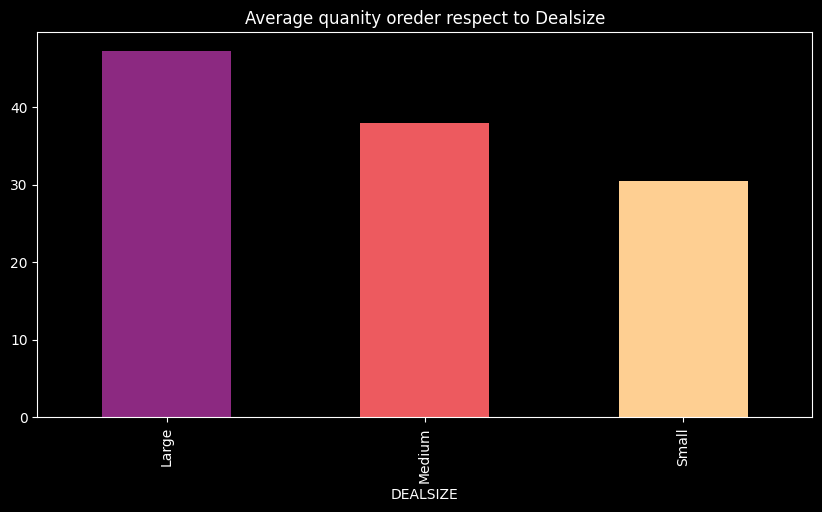

In [18]:
plt.figure(figsize=(10,5))
colors=plt.cm.magma(np.linspace(.4, .9, 3))
data.groupby("DEALSIZE")["QUANTITYORDERED"].mean().plot(
    color=colors,
    kind="bar",)
plt.title('Average quanity oreder respect to Dealsize')
plt.show()


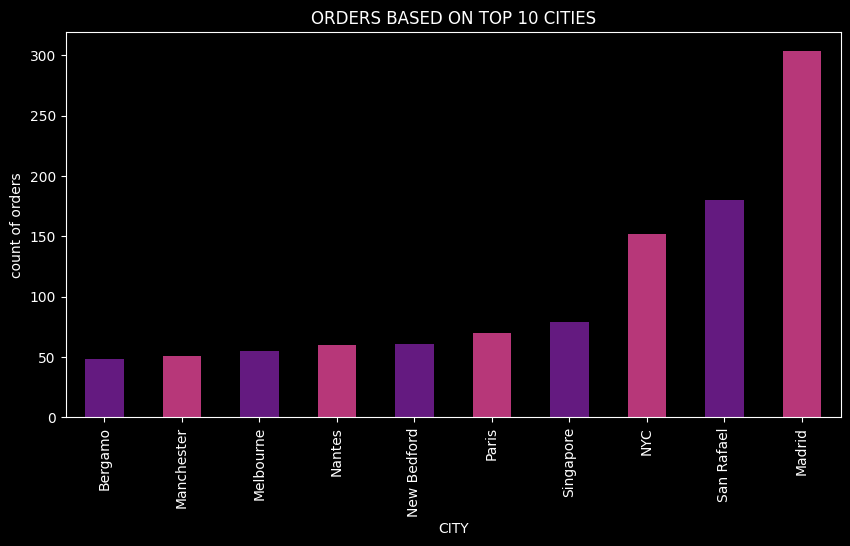

In [19]:
plt.figure(figsize=(10,5))
colors=plt.cm.magma(np.linspace(.3, .5, 2))
data.groupby("CITY")["CITY"].value_counts().sort_values().tail(10).plot(
    color=colors,
    kind="bar",)
plt.title('ORDERS BASED ON TOP 10 CITIES')
plt.ylabel("count of orders")
plt.show()


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CITY                  2747 non-null   object        
 12  POSTALCODE            2747 non-null   object        
 13  COUNTRY           

# **Time series Analysis **

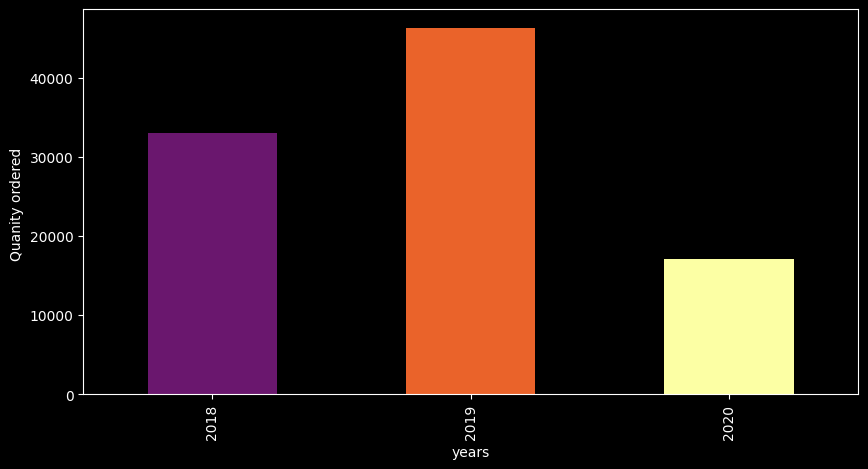

In [21]:
colors=plt.cm.inferno(np.linspace(.3, 1, 3))
plt.figure(figsize=(10,5))
value=data.groupby("YEAR")["QUANTITYORDERED"].sum()
value.plot(kind="bar",color=colors)

plt.xlabel("years")
plt.ylabel("Quanity ordered ")

plt.show()


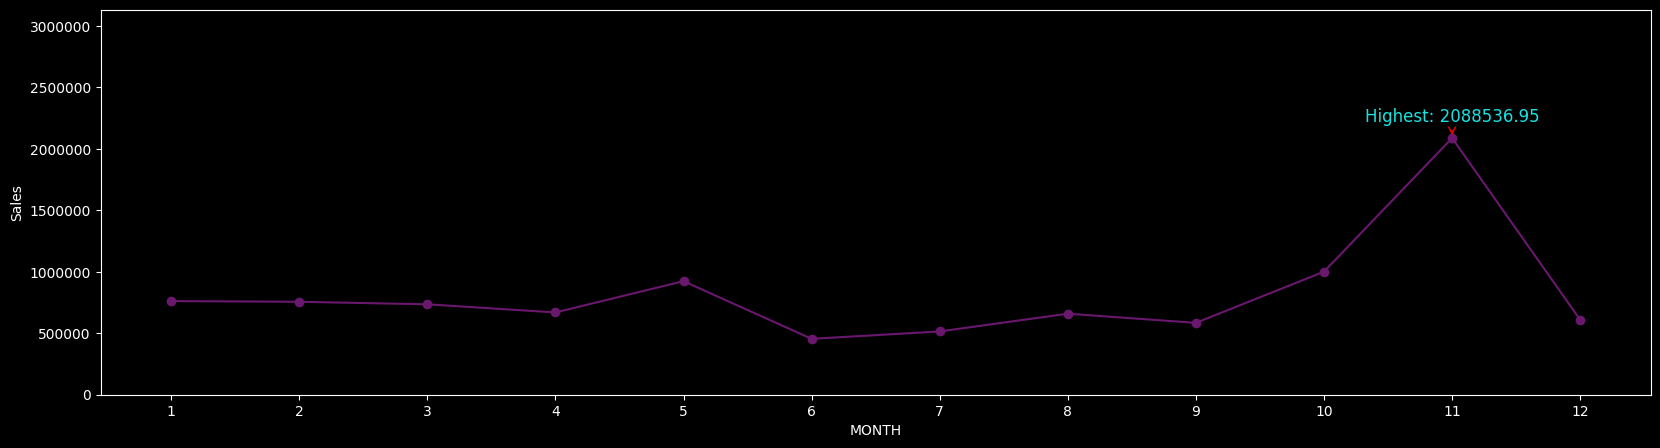

In [22]:
from matplotlib.ticker import ScalarFormatter


plt.figure(figsize=(20,5))

# Group by month and sum sales
monthly_sales = data.groupby(data["MONTH"])["SALES"].sum()

# Plot the line chart
ax = monthly_sales.plot(kind="line", color=colors[0], marker='o')


max_sales = monthly_sales.max()
max_sales_index = monthly_sales.idxmax()
max_sales_x = list(monthly_sales.index).index(max_sales_index)

# Annotate the highest sales point
ax.annotate(f'Highest: {max_sales}',
            (max_sales_x+1, max_sales),
            textcoords="offset points",
            xytext=(0, 12),
            ha='center',
            fontsize=12,
            color='#17e3e0',
            arrowprops=dict(arrowstyle="->", color='red'))

plt.xticks(range(1,13))
plt.ticklabel_format(axis='y', style='plain')
plt.ylabel("Sales")
plt.ylim(0, monthly_sales.max() * 1.5) 
plt.show()

In [23]:
# Ensure data is sorted by date before grouping
data = data.sort_values(by="YEAR")

# Group by month and year, and sum sales
monthly_yearly_sales = data.groupby(data["ORDERDATE"].dt.strftime('%Y-%m'))["SALES"].sum()

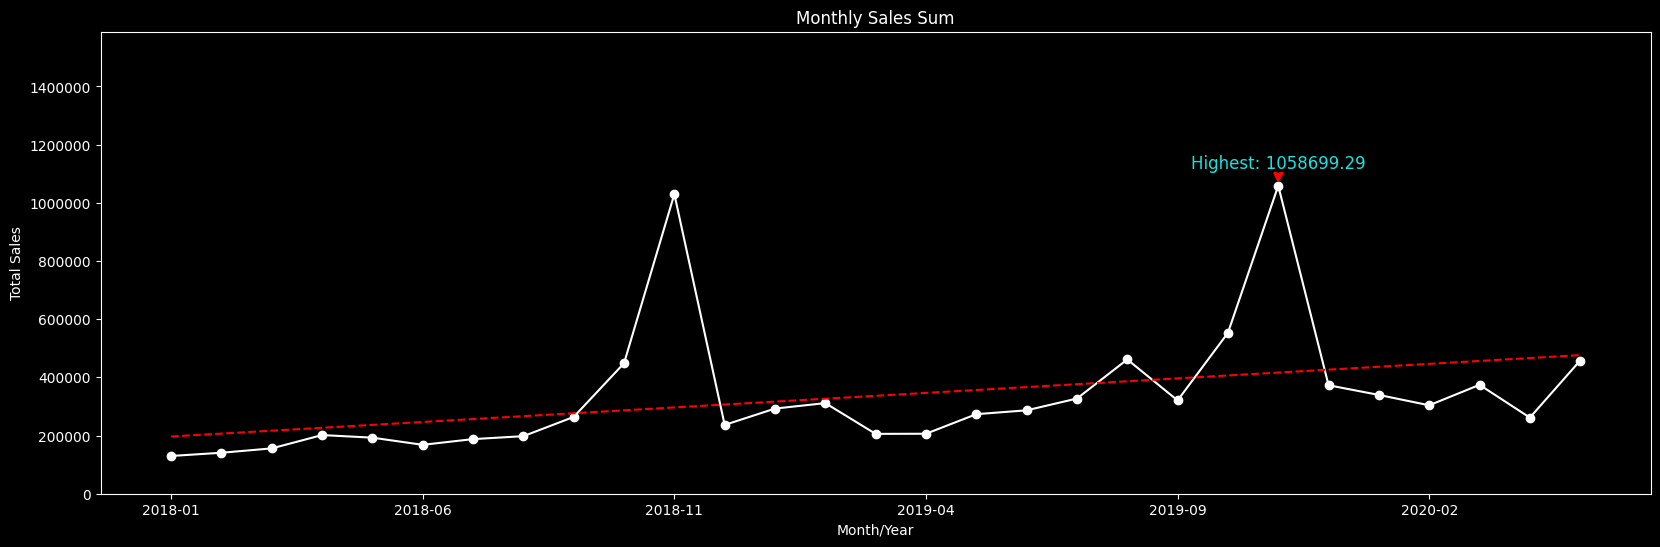

In [24]:

plt.figure(figsize=(20, 6))


# Plot the line chart
ax = monthly_yearly_sales.plot(kind="line", color="white", marker='o')

# Find the maximum sales value and its corresponding index
max_sales = monthly_yearly_sales.max()
max_sales_index = monthly_yearly_sales.idxmax()
max_sales_x = monthly_yearly_sales.index.get_loc(max_sales_index)

# Annotate the highest sales point
ax.annotate(f'Highest: {max_sales}',
            (max_sales_x, max_sales*1.01),
            textcoords="offset points",
            xytext=(0, 10),
            ha='center',
            fontsize=12,
            color='#17e3e0',
            arrowprops=dict(arrowstyle="fancy", linestyle='-', linewidth=2, color='red'))


x = np.arange(len(monthly_yearly_sales))
y = monthly_yearly_sales.values
degree = 1  # linear trend line
coefficients = np.polyfit(x, y, degree)
trendline = np.polyval(coefficients, x)

# Plot the trend line
ax.plot(monthly_yearly_sales.index, trendline, color='red', linestyle='--', label='Trend Line')
# Formatting the y-axis to use plain style


# Setting labels and title
plt.xlabel("Month/Year")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Sum")


plt.ticklabel_format(axis='y', style='plain')
plt.ylim(0, monthly_yearly_sales.max() * 1.5) 
plt.show()


# It shows the increasing  trend line  

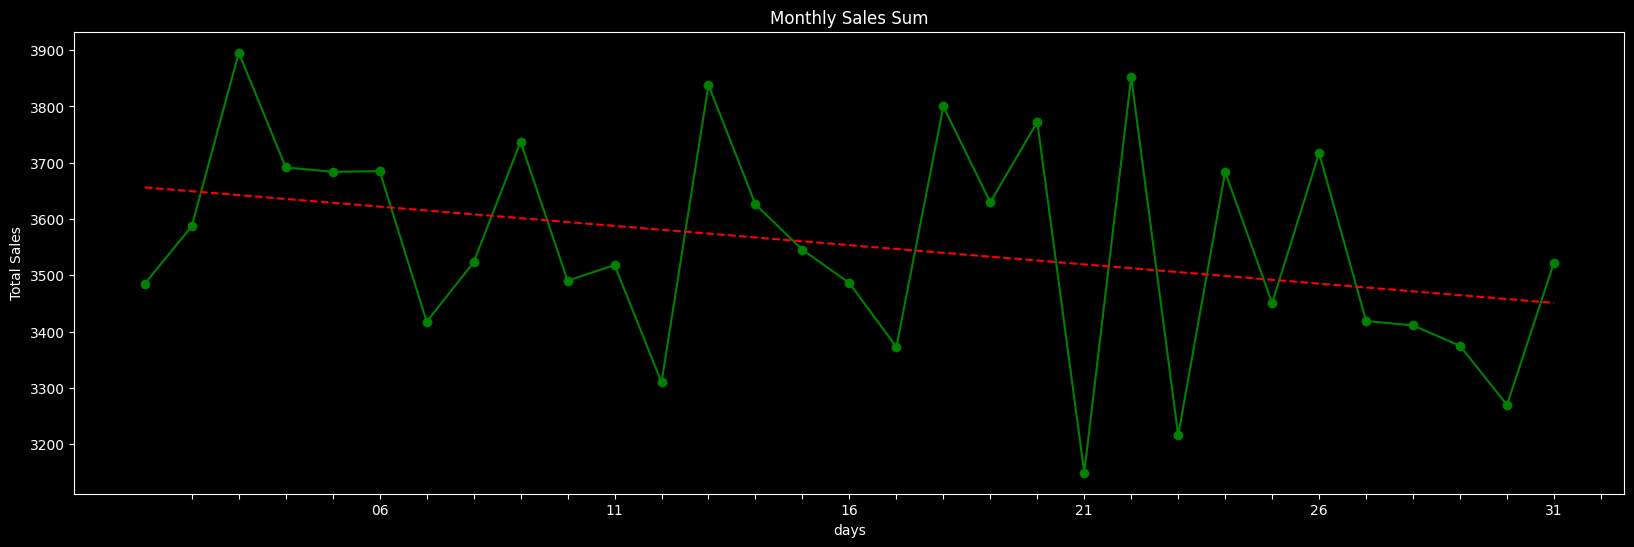

In [25]:

plt.figure(figsize=(20, 6))
data = data.sort_values(by="ORDERDATE")
# Group by month and sum sales
monthly_day_sales = data.groupby(data["ORDERDATE"].dt.strftime('%d'))["SALES"].mean()

# Plot the line chart
ax = monthly_day_sales.plot(kind="line", color="green", marker='o')

# Find the maximum sales value and its corresponding index
max_sales = monthly_day_sales.max()
max_sales_index = monthly_day_sales.idxmax()
max_sales_x = monthly_day_sales.index.get_loc(max_sales_index)


x = np.arange(len(monthly_day_sales))
y = monthly_day_sales.values
degree = 1  # linear trend line
coefficients = np.polyfit(x, y, degree)
trendline = np.polyval(coefficients, x)

# Plot the trend line
ax.plot(monthly_day_sales.index, trendline, color='red', linestyle='--', label='Trend Line')
# Formatting the y-axis to use plain style

# Setting labels and title
plt.xticks(range(1,32))
plt.xlabel("days")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Sum")
#plt.grid(True)


plt.show()


## **It clearly shows that at the beginning of the month, there are higher sales which gradually decrease over time.**

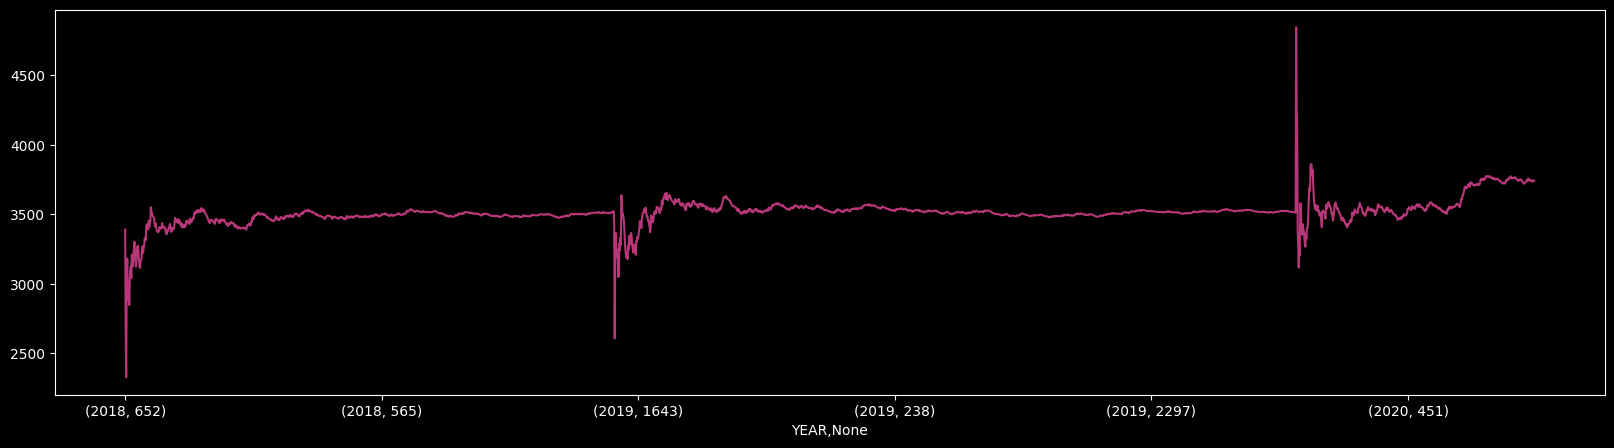

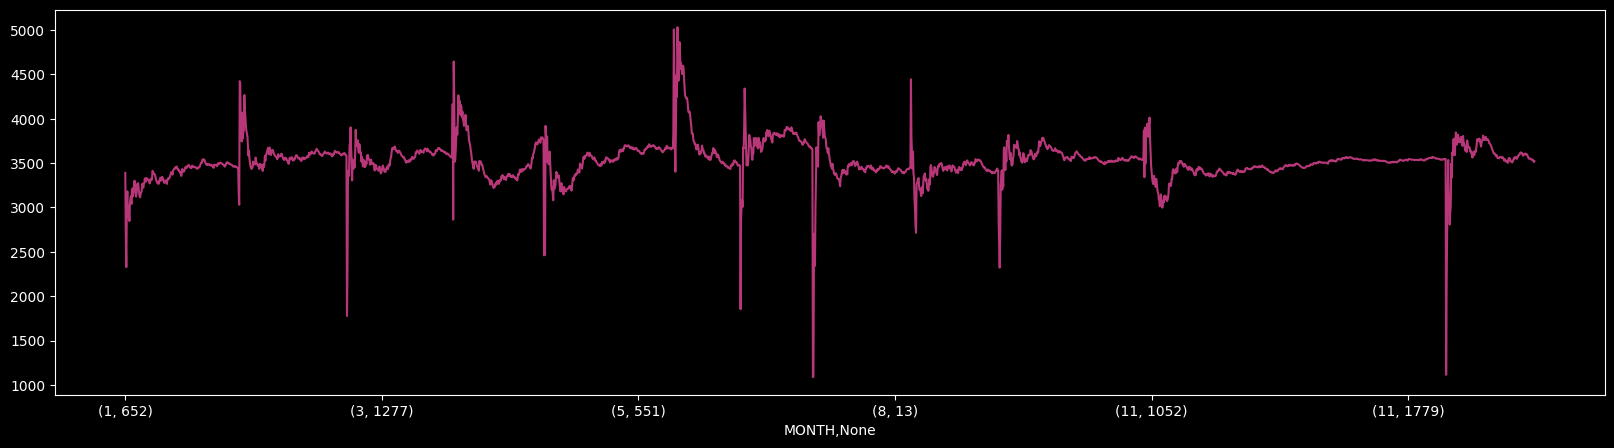

In [26]:
colors=plt.cm.magma(np.linspace(.5, .6, 7))


plt.figure(figsize=(20,5))
data.groupby("YEAR")["SALES"].ewm(span=10000, adjust=True).mean().plot(kind="line",color=colors)

plt.figure(figsize=(20,5))
data.groupby("MONTH")["SALES"].ewm(span=60000, adjust=True).mean().plot(kind="line",color=colors)
plt.show()

# **Thanking you**